<a href="https://colab.research.google.com/github/Antekba/Uczenie-maszynowe/blob/main/Case_2_Antoni_Baran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')


In [4]:
# Liczba filmów Sci-Fi
movies['genres'] = movies['genres'].astype(str)  # Upewnienie się, że gatunki są typu string
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]
print(f"Liczba filmów Sci-Fi: {len(sci_fi_movies)}")

Liczba filmów Sci-Fi: 980


<ipython-input-5-8b9d2e45e621>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=comedy_ratings, palette='viridis')


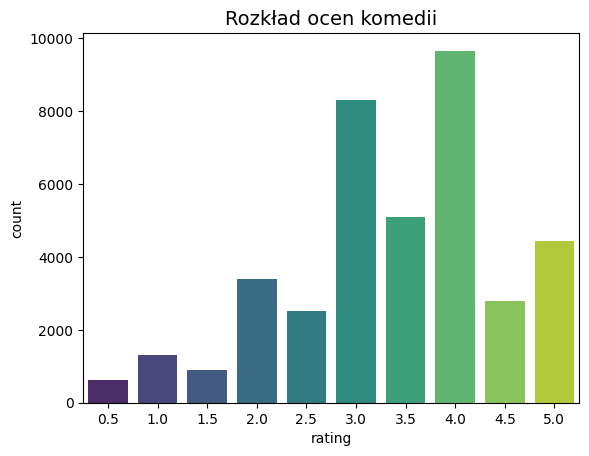

In [5]:
# Rozkład ocen komedii
comedy_movies = movies[movies['genres'].str.contains('Comedy')]
comedy_ratings = ratings[ratings['movieId'].isin(comedy_movies['movieId'])]
sns.countplot(x='rating', data=comedy_ratings, palette='viridis')
plt.title('Rozkład ocen komedii', fontsize=14)
plt.show()


In [6]:
# Średnia ocena wszystkich filmów akcji
action_movies = movies[movies['genres'].str.contains('Action')]
action_ratings = ratings[ratings['movieId'].isin(action_movies['movieId'])]
action_ratings_mean = action_ratings.groupby('movieId')['rating'].mean()
print(f"Średnia ocen wszystkich filmów akcji: {action_ratings_mean.mean()}")

Średnia ocen wszystkich filmów akcji: 3.094498449195514


In [7]:
# Najwyżej oceniane filmy akcji
top_rated_action_movies = action_ratings_mean.sort_values(ascending=False).head(3)
top_rated_action_movie_details = movies[movies['movieId'].isin(top_rated_action_movies.index)]
for index, row in top_rated_action_movie_details.iterrows():
    print(f"{row['title']} - Średnia ocena: {top_rated_action_movies.loc[row['movieId']]:.2f}")

Love Exposure (Ai No Mukidashi) (2008) - Średnia ocena: 5.00
Crippled Avengers (Can que) (Return of the 5 Deadly Venoms) (1981) - Średnia ocena: 5.00
Tokyo Tribe (2014) - Średnia ocena: 5.00


In [9]:
!pip install surprise
import pandas as pd
from surprise import Reader, Dataset
from surprise import SVD, KNNWithMeans
from surprise.model_selection import GridSearchCV, cross_validate


In [10]:
# Wczytanie danych
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')

In [11]:
# Przygotowanie danych do Surprise
reader = Reader(rating_scale=(ratings['rating'].min(), ratings['rating'].max()))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [12]:
# Walidacja krzyżowa algorytmu SVD
algo_svd = SVD()
cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8779  0.8720  0.8668  0.8782  0.8770  0.8744  0.0044  
MAE (testset)     0.6746  0.6718  0.6670  0.6768  0.6722  0.6725  0.0033  
Fit time          1.80    2.64    4.77    3.61    3.90    3.34    1.03    
Test time         0.13    0.43    0.25    0.42    0.20    0.29    0.12    


{'test_rmse': array([0.87786628, 0.87203909, 0.86679869, 0.87818713, 0.87699749]),
 'test_mae': array([0.67461585, 0.67179359, 0.66697357, 0.67677397, 0.6721869 ]),
 'fit_time': (1.7966883182525635,
  2.6353554725646973,
  4.773719549179077,
  3.6123759746551514,
  3.903369903564453),
 'test_time': (0.12715506553649902,
  0.4264671802520752,
  0.2505216598510742,
  0.4231741428375244,
  0.19861054420471191)}

In [13]:
# Definicja i walidacja krzyżowa algorytmu KNNWithMeans
algo_knn_means = KNNWithMeans()
cross_validate(algo_knn_means, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9002  0.8913  0.9022  0.8928  0.9053  0.8984  0.0055  
MAE (testset)     0.6862  0.6801  0.6874  0.6830  0.6935  0.6860  0.0045  
Fit time          0.21    0.20    0.45    0.59    0.75    0.44    0.21    
Test time         2.65    3.76    3.48    6.29    3.87    4.01    1.22    


{'test_rmse': array([0.90016243, 0.89126169, 0.90223946, 0.89275486, 0.90534508]),
 'test_mae': array([0.68619489, 0.68011112, 0.68740691, 0.68296728, 0.69348352]),
 'fit_time': (0.20653843879699707,
  0.2040865421295166,
  0.4476332664489746,
  0.5904552936553955,
  0.7470090389251709),
 'test_time': (2.6461994647979736,
  3.763934850692749,
  3.479910373687744,
  6.2860236167907715,
  3.8733479976654053)}

In [14]:
# Użycie GridSearchCV do hiperparametryzacji KNNWithMeans
param_grid = {'k': [2, 3, 4, 5, 6]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE', 'MAE'], cv=5)
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [15]:
# Najlepsze parametry i wyniki
print(f"Najlepsze parametry: {gs.best_params['rmse']}")
print(f"Najlepszy RMSE: {gs.best_score['rmse']}")

Najlepsze parametry: {'k': 6}
Najlepszy RMSE: 0.9216264930692188


In [16]:
# Najlepszy estimator dla RMSE
best_knn_means = gs.best_estimator['rmse']
cross_validate(best_knn_means, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9263  0.9199  0.9213  0.9214  0.9232  0.9224  0.0022  
MAE (testset)     0.7112  0.7066  0.7076  0.7085  0.7112  0.7090  0.0019  
Fit time          0.23    0.27    0.26    0.25    0.27    0.25    0.02    
Test time         2.52    1.30    1.48    1.47    1.96    1.75    0.45    


{'test_rmse': array([0.92630042, 0.91989023, 0.92129634, 0.92143013, 0.92322463]),
 'test_mae': array([0.71122952, 0.70658384, 0.70757684, 0.7085238 , 0.7111965 ]),
 'fit_time': (0.22823405265808105,
  0.2741274833679199,
  0.2550332546234131,
  0.2501809597015381,
  0.2653801441192627),
 'test_time': (2.524986743927002,
  1.2951159477233887,
  1.483670949935913,
  1.467085361480713,
  1.9594612121582031)}

## Standardowy algorytm kNN (k-Nearest Neighbors) w kontekście systemów rekomendacyjnych wybiera k najbardziej podobnych użytkowników lub elementów do danego użytkownika lub elementu i na tej podstawie dokonuje predykcji oceny. Predykcje są zwykle średnią oceną danych k sąsiadów.

## Za to algorytm kNN with Means rozwija ten pomysł poprzez uwzględnienie średniej oceny danego użytkownika (lub elementu) przy obliczaniu predykcji. Innymi słowy, kNN with Means dostosowuje oceny o średnią ocenę użytkownika (w przypadku rekomendacji użytkownik-bazowych) lub o średnią ocenę elementu (w przypadku rekomendacji opartych na elementach) przed obliczeniem predykcji.

## Dzięki temu, nawet jeśli użytkownik jest skłonny oceniać wszystko wysoko lub nisko, jego indywidualne tendencje oceniania są wyrównane, co pozwala na bardziej trafne rekomendacje.

In [17]:
import pandas as pd
from surprise import Reader, Dataset
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split

# Wczytanie danych
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

# Przygotowanie danych do Surprise
reader = Reader(rating_scale=(ratings['rating'].min(), ratings['rating'].max()))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [18]:
# Tworzenie zbioru treningowego
trainset = data.build_full_trainset()

# Model
algo_knn_means = KNNWithMeans(k=5)  # Wybór liczby sąsiadów
algo_knn_means.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [19]:
# Wyszukiwanie ID filmów
jumanji_id = movies[movies['title'].str.contains('Jumanji', case=False, regex=False)]['movieId'].iloc[0]
flint_id = movies[movies['title'].str.contains('Flint', case=False, regex=False)]['movieId'].iloc[0]

In [20]:
# Funkcja pomocnicza do rekomendacji filmów
def get_recommendations(movie_id, algo, n=10):
    inner_id = algo.trainset.to_inner_iid(movie_id)
    neighbors = algo.get_neighbors(inner_id, k=n)
    neighbor_movie_ids = [algo.trainset.to_raw_iid(inner_n) for inner_n in neighbors]
    return movies[movies['movieId'].isin(neighbor_movie_ids)]


In [21]:
# Rekomendacje dla filmu Jumanji
print("Rekomendacje dla filmu 'Jumanji':")
jumanji_recs = get_recommendations(jumanji_id, algo_knn_means)
print(jumanji_recs[['movieId', 'title']])

Rekomendacje dla filmu 'Jumanji':
      movieId                                title
512       595          Beauty and the Beast (1991)
514       597                  Pretty Woman (1990)
734       954  Mr. Smith Goes to Washington (1939)
964      1265                 Groundhog Day (1993)
1640     2186          Strangers on a Train (1951)
1791     2390                  Little Voice (1998)
1866     2478                ¡Three Amigos! (1986)
3173     4273                Under the Sand (2000)
7010    68157          Inglourious Basterds (2009)
7185    72378                          2012 (2009)


In [22]:
# Sprawdzenie czy film 'Flint' istnieje w zbiorze danych
if 'Flint' in movies['title'].values:
    flint_id = movies[movies['title'].str.contains('Flint', case=False, regex=False)]['movieId'].iloc[0]
    try:
        # Rekomendacje dla filmu Flint
        print("\nRekomendacje dla filmu 'Flint':")
        flint_recs = get_recommendations(flint_id, algo_knn_means)
        print(flint_recs[['movieId', 'title']])
    except Exception as e:
        print(f"Błąd: {e}")
else:
    print("Film 'Flint' nie został znaleziony w zbiorze danych.")

Film 'Flint' nie został znaleziony w zbiorze danych.
